# Python Cheatsheets - DATA ANALYSIS

## Data Visualization

### Matplotlib
Matplotlib is a Python package to create two-dimensional plots from data stored in a variety of data structures (i.e. lists, numpy arrays, pandas dataframes). It uses an object oriented approach for plotting to build plots step-by-step by adding new elements to the plot.

In [1]:
# import necessary libraries for plotting, and file reading
import matplotlib.pyplot as plt
import numpy as np
import csv

Matplotlib provides many common plotting commands. Some of these plotting commands are shown below. For more types, please refer to the original matplotlib package sources (https://matplotlib.org/stable/plot_types).

#### 1) Line Plot 
A line plot is a simple plot joining straight lines connecting data points where the x-axis and y-axis values intersect.

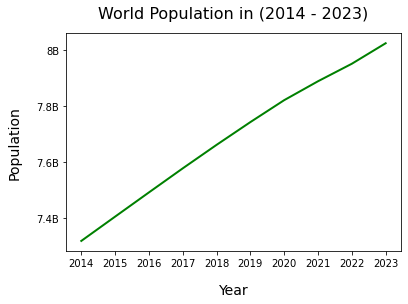

In [93]:
# Line Plot (world population extracted from https://databank.worldbank.org/)
file = open("data/world_population.csv", "r")
[year, pop] = list(csv.reader(file, delimiter=";"))
file.close()

pop = [int(i) for i in pop]
# Plot the data using preferred style (for detailed arguments: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
plt.plot(year, pop, color='green', linewidth=2.0)

# Customize plot labels
plt.title("World Population in (2014 - 2023)", pad=15, fontsize=16)
plt.xlabel('Year', labelpad=15, fontsize=14)
plt.ylabel('Population', labelpad=15, fontsize=14)

# Adapt the ticks on the y-axis
tick_val = [7400000000, 7600000000, 7800000000, 8000000000]
tick_lab = ['7.4B', '7.6B', '7.8B', '8B']
plt.yticks(tick_val, tick_lab)

# Customizations need to be completed before .show() to be visible
plt.show()

#### 2) Scatter Plot 
A scatter plot is more suitable in cases such as assessing a correlation between two variables rather than observing a time data.

In [96]:
# Scatter Plot (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
file = open("data/life_expectancy.csv", "r")
table = list(csv.reader(file, delimiter=";"))
file.close()

Read the necessary columns from the data for demonstration and plot customization.

In [104]:
# Get the related data for plotting (easier and faster with pandas, this is only for demonstration)
gdp_cap = [float(i[13]) for i in table[1:] if int(i[2])==2000]
life_exp = [float(i[20]) for i in table[1:] if int(i[2])==2000]

# Get the population and store as a numpy array to create different sized bubles
pop = [float(i[14]) for i in table[1:] if int(i[2])==2000]
np_pop = np.array(pop)

# Get the region and store as an array to match with colors using a dictionary
region = [i[1] for i in table[1:] if int(i[2])==2000]
dict = {
    'Africa':'red',
    'Asia':'purple',
    'Central America and Caribbean':'magenta',
    'European Union':'blue',
    'Middle East':'black',
    'North America':'green',
    'Oceania':'brown',
    'Rest of Europe':'navy',
    'South America':'orange'
}
col = [*map(dict.get, region)]

Plot the data using the data elements and preferred customizationsç

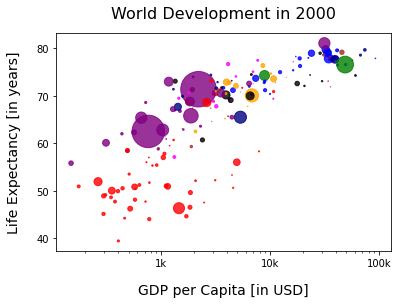

In [105]:
# Change the line plot below to a scatter plot
plt.scatter(gdp_cap, life_exp, s = np_pop, c = col, alpha = 0.8)

# Put the x-axis on a logarithmic scale
plt.xscale('log')

# Customize plot labels
plt.title("World Development in 2000", pad=15, fontsize=16)
plt.xlabel('GDP per Capita [in USD]', labelpad=15, fontsize=14)
plt.ylabel('Life Expectancy [in years]', labelpad=15, fontsize=14)

# Adapt the ticks on the x-axis
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']
plt.xticks(tick_val, tick_lab)

plt.show()

#### 3) Histogram 
A histogram divides data into bins and counts the number of data points in each bin, where the height of each bar represents the count of data points within that bin. It is useful to explore the data and get an idea about the distribution. If not specified, by default Python sets the number of bins to 10. Too few bins will oversimplify, while too many bins will overcomplicate the reality.

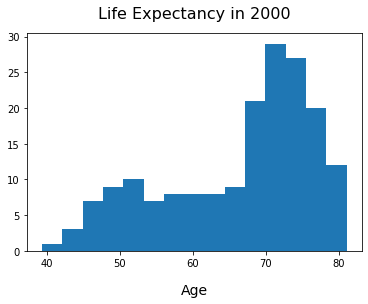

In [88]:
# Use the same life expectancy data and plot histogram with 15 bins
plt.hist(life_exp, 15)

# Show plot
plt.title("Life Expectancy in 2000", pad=15, fontsize=16)
plt.xlabel('Age', labelpad=15, fontsize=14)
plt.show()

# To clear the plot if necessary
#plt.clf() 